Project 7: Air Quality Index (AQI) Analysis

AQI is a standardized indicator used to represent overall air pollution levels based on the concentration of major pollutants. Understanding AQI trends is essential for assessing environmental conditions and public health risks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

The dataset used in this project contains historical air quality measurements from various Indian cities.
It includes pollutant concentration values such as PM2.5, PM10, NO₂, SO₂, CO, and O₃, along with the computed AQI.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [4]:
df = pd.read_csv('/content/city_day.csv')
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


Before analysis, it is important to understand the structure of the dataset.<br>
This step includes checking the number of rows, columns, and data types.<br>
It also helps identify missing values and abnormal pollutant readings.<br>
Summary statistics provide insight into AQI and pollutant ranges.<br>
This inspection guides data cleaning decisions.

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  object 
 1   Datetime    18265 non-null  object 
 2   PM2.5       18265 non-null  float64
 3   PM10        18265 non-null  float64
 4   NO          18265 non-null  float64
 5   NO2         18265 non-null  float64
 6   NOx         18265 non-null  float64
 7   NH3         18265 non-null  float64
 8   CO          18265 non-null  float64
 9   SO2         18265 non-null  float64
 10  O3          18265 non-null  float64
 11  Benzene     18265 non-null  float64
 12  Toluene     18265 non-null  float64
 13  Xylene      18265 non-null  float64
 14  AQI         18265 non-null  float64
 15  AQI_Bucket  18265 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.2+ MB


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,250.597695,299.442491,100.481035,75.415916,125.964079,25.065042,5.002451,49.835839,100.406740,10.070033,15.063365,4.996341,251.111382
std,144.460292,173.479906,57.774795,43.460066,72.403893,14.452019,2.889439,28.988739,57.591436,5.785282,8.619433,2.899152,144.502626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.700000,150.100000,50.600000,37.700000,63.100000,12.600000,2.490000,24.400000,50.600000,5.080000,7.640000,2.510000,125.400000
50%,251.000000,300.300000,100.200000,76.000000,126.200000,25.300000,5.000000,49.900000,100.700000,10.080000,15.130000,4.960000,251.200000
75%,376.200000,450.000000,151.000000,113.200000,188.900000,37.600000,7.510000,75.100000,150.400000,15.110000,22.500000,7.530000,376.400000
max,499.900000,600.000000,200.000000,150.000000,250.000000,50.000000,10.000000,100.000000,200.000000,20.000000,30.000000,10.000000,500.000000


Environmental datasets often contain missing or incomplete records.<br>
Missing pollutant values can negatively affect analysis and modeling results.<br>
In this project, numerical missing values are handled using mean imputation.<br>
This approach preserves dataset size while maintaining overall trends.<br>
Proper cleaning improves reliability of further analysis.

In [6]:
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)

Exploratory Data Analysis helps in understanding AQI behavior and distribution.<br>
Visualizing AQI values reveals common pollution ranges and skewness.<br>
EDA also highlights variability across different observations.<br>
Such analysis provides context before applying machine learning models.<br>
It forms the foundation for meaningful interpretation.


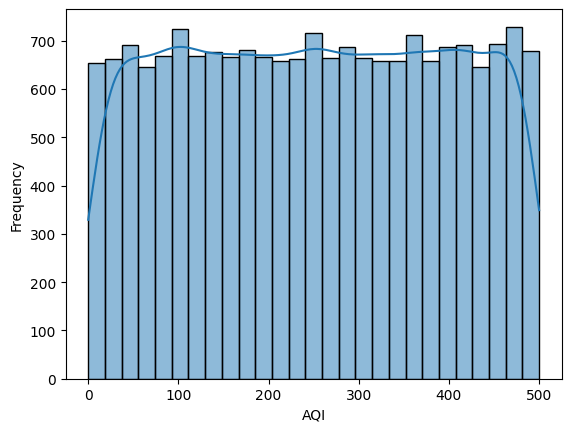

In [7]:
plt.figure()
sns.histplot(df['AQI'], kde=True)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

Air pollutants often influence AQI in a combined manner rather than independently.<br>
Correlation analysis helps identify relationships between pollutants and AQI.<br>
Strong correlations indicate pollutants with greater AQI impact.<br>
A heatmap provides a clear visual summary of these relationships.<br>
This aids environmental interpretation of the data.

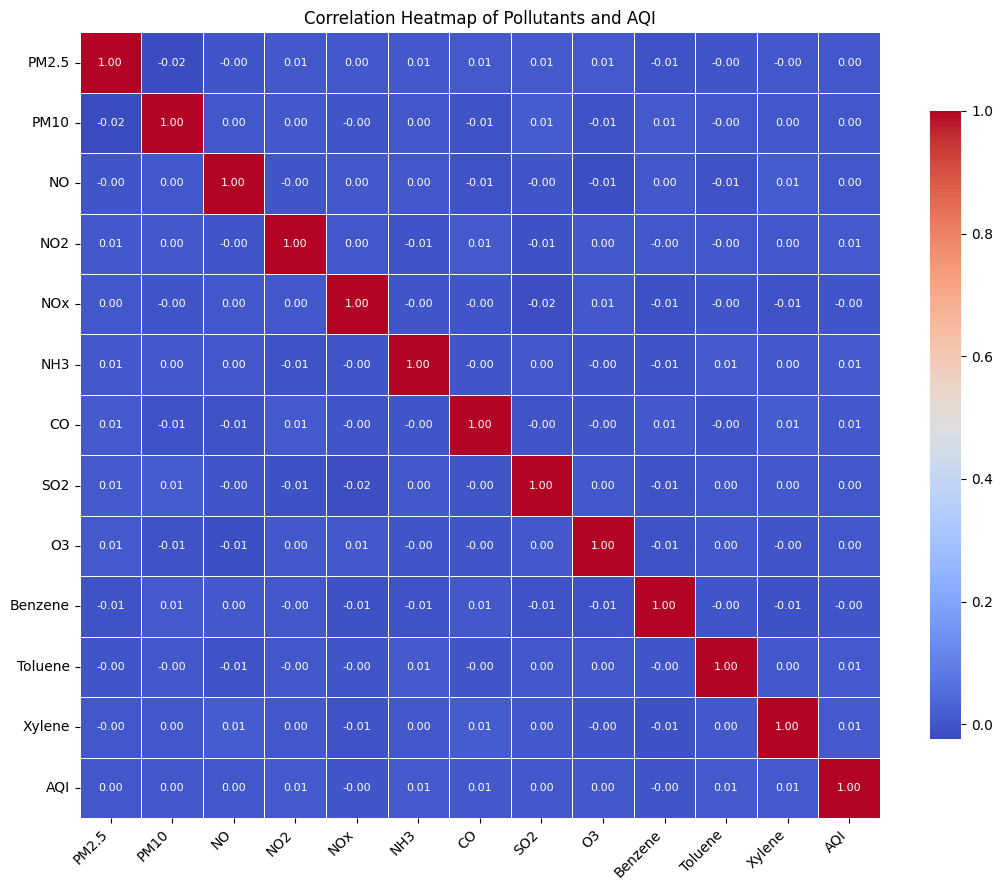

In [14]:
plt.figure(figsize=(11,9))
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size":8},
    cbar_kws={"shrink":0.8}
)
plt.title("Correlation Heatmap of Pollutants and AQI", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Air pollution levels vary significantly between cities.<br>
Calculating average AQI values allows comparison across regions.<br>
This analysis highlights cities with consistently higher pollution levels.<br>
Such comparisons are useful for regional and policy-level insights.<br>
They also reveal spatial air quality patterns.

In [9]:
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
city_avg_aqi.head()

,AQI
City,
Mumbai,253.319053
Delhi,251.496304
Kolkata,250.635396
Chennai,250.338763
Bangalore,249.767397


After understanding the data patterns, a simple machine learning model is applied.<br>
The objective is to predict AQI using pollutant concentration values.<br>
A Random Forest Regressor is selected for its ability to model nonlinear relations.<br>
The focus is on interpretability rather than aggressive optimization.<br>
This step provides predictive insight into AQI behavior.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model evaluation helps assess how well pollutant values explain AQI trends.<br>
Regression metrics provide insight into prediction performance.<br>
Although prediction accuracy is not the primary objective, results are informative.<br>

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: -0.032637391266568505
RMSE: 146.58809236147863


This project demonstrates practical application of data analysis and ML.<br>
Future work may include seasonal or time-series AQI forecasting.